In [2]:
import numpy as np
import pandas as pd
from typing import Dict, Tuple
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import SGDClassifier
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [3]:
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
features = data.drop(['target'], axis=1)
target_tmp = data['target']
target = pd.DataFrame({'target':target_tmp.index, 'target':target_tmp.values})

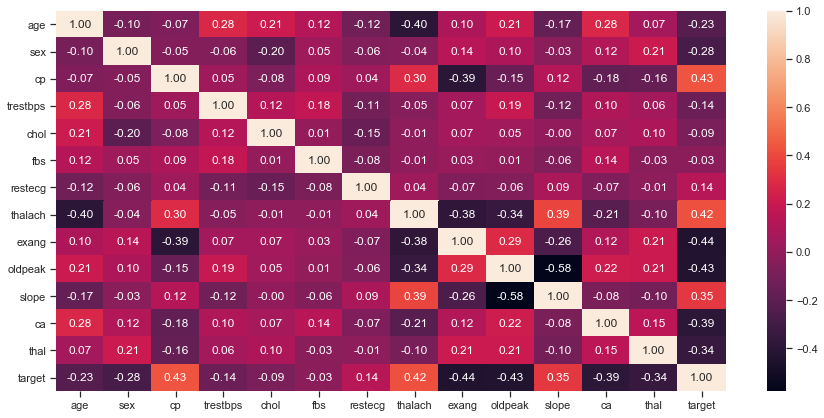

In [5]:
#Построим корреляционную матрицу
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(data.corr(method='pearson'), ax=ax, annot=True, fmt='.2f')

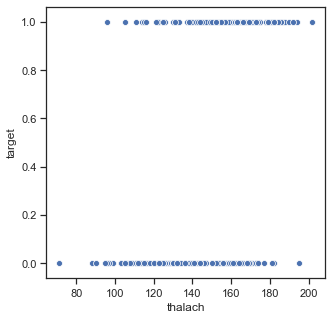

In [6]:
fig, ax = plt.subplots(figsize=(5,5)) 
sns.scatterplot(ax=ax, x='thalach', y='target', data=data)

In [11]:
#разделяем выборку на обучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=1)

In [12]:
x_array_train = X_train['thalach'].values
y_array_train = y_train.values

In [13]:
# Обучим линейную регрессию 
reg1 = LinearRegression().fit(x_array_train.reshape(-1, 1), y_array_train.reshape(-1, 1))
reg1.intercept_[0]

-0.8620747215416923

In [14]:
reg1.coef_[0][0]

0.00946862187682989

In [15]:
x_array_test = X_test['thalach'].values
y_array_test = y_test.values

In [16]:
#для тестовой выборки
reg2 = LinearRegression().fit(x_array_test.reshape(-1, 1), y_array_test.reshape(-1, 1))
reg2.intercept_[0]

-0.6486506259036725

In [17]:
reg1.coef_[0][0]

0.00946862187682989

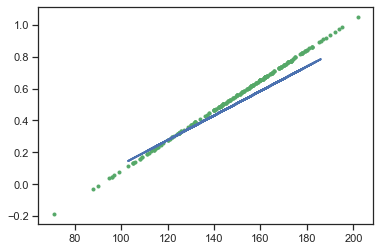

In [20]:
def y_regr(x_array : np.ndarray, b0: float, b1: float) -> np.ndarray:
    res = [b1*x+b0 for x in x_array]
    return res
y_array_regr1 = y_regr(x_array_train, reg1.intercept_[0], reg1.coef_[0][0])
y_array_regr2 = y_regr(x_array_test, reg2.intercept_[0], reg2.coef_[0][0])
plt.plot(x_array_train, y_array_regr1, 'g.')
plt.plot(x_array_test, y_array_regr2, 'b', linewidth=2.0)
plt.show()

In [25]:
from sklearn.linear_model import Lasso

In [29]:
res1 = Lasso(alpha=1.0).fit(X_train, y_train)
predict1 = res1.predict(X_test)

predict1
y_test["target"].values

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1], dtype=int64)

In [30]:
accuracy_score(y_test, predict1.round())

0.639344262295082

In [31]:
precision_score(y_test, predict1.round())

0.6153846153846154

In [38]:
from sklearn.svm import LinearSVC

res2 = LinearSVC(C=1.0, penalty='l1', dual=False, max_iter=100000).fit(X_train, y_train)
predict2 = res2.predict(X_test)
predict2

c:\users\пк\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1], dtype=int64)

In [39]:
y_test["target"].values

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1], dtype=int64)

In [40]:
accuracy_score(y_test, predict2.round())

0.7377049180327869

In [41]:
precision_score(y_test, predict2.round())

0.7142857142857143

In [43]:
from sklearn.tree import  DecisionTreeRegressor
res3 = DecisionTreeRegressor().fit(X_train, y_train)
predict3 = res3.predict(X_test)
predict3

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1.,
       0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0.,
       0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 0., 0., 0., 0.])

In [44]:
y_test['target'].values
accuracy_score(y_test, predict3.round())

0.7213114754098361

In [45]:
precision_score(y_test, predict3.round())

0.71875